In [1]:
import time
import csv
from csv import reader
import pyorient
from pyArango.connection import *
from neo4j import GraphDatabase
from arango import ArangoClient
import matplotlib.pyplot as plt
import numpy as np

In [2]:
candidates = ['id.ac','ru.ac','ut.ac','acs.ac','kcu.ac']

In [3]:
with open('results_outbound/arangodb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_outbound/orientdb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_outbound/neo4j.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()

In [4]:
def writedata(data,filepath):
    with open(filepath, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)
        file.close()

In [5]:
# Orientdb Connection
client = pyorient.OrientDB("localhost", 2424)
client.set_session_token(True)
session_id = client.connect("root", "orientdb")
client.db_open( "new", "root", "orientdb" )

In [6]:
orientResult=[]
for apex in candidates:
    orientResult.append(apex)
    for depth in range(2,11):
        start_time = time.time()
        result = client.query("SELECT $path FROM (TRAVERSE out() FROM (SELECT @rid from `apex` where name = '{}') MAXDEPTH {})".format(apex,depth),1000,"*:-1")
        orientResult.append((time.time() - start_time))
    writedata(orientResult,'results_outbound/orientdb.csv')
    print(orientResult)
    orientResult=[]

['id.ac', 0.04195046424865723, 0.035538673400878906, 0.03600287437438965, 0.03529834747314453, 0.036319732666015625, 0.038697242736816406, 0.03682088851928711, 0.03865242004394531, 0.03557872772216797]
['ru.ac', 0.03704690933227539, 0.03563547134399414, 0.036224365234375, 0.03543233871459961, 0.03604769706726074, 0.040866851806640625, 0.038446903228759766, 0.03783106803894043, 0.036727190017700195]
['ut.ac', 0.035529375076293945, 0.03912711143493652, 0.03912615776062012, 0.03990006446838379, 0.03808927536010742, 0.042995452880859375, 0.03649187088012695, 0.03674650192260742, 0.03896188735961914]
['acs.ac', 0.037104129791259766, 0.04053807258605957, 0.03881382942199707, 0.03455352783203125, 0.049077749252319336, 0.04032135009765625, 0.034986257553100586, 0.037654876708984375, 0.03793144226074219]
['kcu.ac', 0.034354448318481445, 0.03389596939086914, 0.03639054298400879, 0.03750109672546387, 0.039077043533325195, 0.03991365432739258, 0.03523373603820801, 0.03482484817504883, 0.0334732532

In [7]:
client = ArangoClient(hosts='http://localhost:8529')
db = client.db('new', username='root', password='graphdbbenchmark')

In [8]:
arangoResult=[]
for apex in candidates:
    arangoResult.append(apex)
    for depth in range(2,11):        
        query = "FOR v,e,p IN 1..{} outbound 'apex/{}' GRAPH 'final' LIMIT 1000 RETURN p".format(depth,apex)
        start_time = time.time()
        db.aql.execute(query)
        arangoResult.append((time.time() - start_time))
    writedata(arangoResult,'results_outbound/arangodb.csv')
    print(arangoResult)
    arangoResult=[]

['id.ac', 0.012373208999633789, 0.003816843032836914, 0.003520965576171875, 0.003458738327026367, 0.003824472427368164, 0.0038983821868896484, 0.004836559295654297, 0.0038902759552001953, 0.0033333301544189453]
['ru.ac', 0.004204511642456055, 0.0036385059356689453, 0.003215312957763672, 0.003573894500732422, 0.003153085708618164, 0.0035283565521240234, 0.003848552703857422, 0.00400090217590332, 0.004034519195556641]
['ut.ac', 0.004859209060668945, 0.003576517105102539, 0.0038213729858398438, 0.003989696502685547, 0.0037605762481689453, 0.0034372806549072266, 0.0037453174591064453, 0.004456996917724609, 0.003430604934692383]
['acs.ac', 0.004530191421508789, 0.003987312316894531, 0.0033767223358154297, 0.0030765533447265625, 0.0033299922943115234, 0.0036466121673583984, 0.003681659698486328, 0.0033621788024902344, 0.003408670425415039]
['kcu.ac', 0.004773139953613281, 0.00389862060546875, 0.004082679748535156, 0.003296375274658203, 0.0034046173095703125, 0.003034830093383789, 0.003117799

In [9]:
# Neo4j Connection
uri = "neo4j://0.0.0.0:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "test"))

In [10]:
neoResult=[]
for apex in candidates:
    neoResult.append(apex)
    for depth in range(2,11):        
        with driver.session(database='neo4j') as session:
            start_time = time.time()
            query = "MATCH p=(a:apex)-[r*1..{}]->() where a._id='apex/{}' RETURN p LIMIT 1000".format(depth,apex)
            result=session.run(query)           
            neoResult.append((time.time() - start_time))
    writedata(neoResult,'results_outbound/neo4j.csv')
    print(neoResult)
    neoResult=[]

['id.ac', 0.05045437812805176, 0.027276992797851562, 0.02952122688293457, 0.028458118438720703, 0.02106451988220215, 0.02158641815185547, 0.023665189743041992, 0.047457218170166016, 0.026190757751464844]
['ru.ac', 0.04999351501464844, 0.05539846420288086, 0.03603672981262207, 0.0384063720703125, 0.03609943389892578, 0.03947949409484863, 0.03857874870300293, 0.03798055648803711, 0.051667213439941406]
['ut.ac', 0.026433944702148438, 0.025000572204589844, 0.022341251373291016, 0.02263927459716797, 0.02255702018737793, 0.026719331741333008, 0.010894298553466797, 0.00841832160949707, 0.009341716766357422]
['acs.ac', 0.010341882705688477, 0.008468151092529297, 0.0086212158203125, 0.009302854537963867, 0.009154081344604492, 0.00886082649230957, 0.008613824844360352, 0.009260177612304688, 0.010475635528564453]
['kcu.ac', 0.009333372116088867, 0.008643865585327148, 0.009047269821166992, 0.010342597961425781, 0.010210275650024414, 0.009256362915039062, 0.009103059768676758, 0.011452198028564453,

In [11]:
neo=[]
list=[]
with open('results_outbound/neo4j.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            neo.append(sum/5)
print(neo)

[0.029311418533325195, 0.024957609176635743, 0.02111353874206543, 0.021829843521118164, 0.019817066192626954, 0.021180486679077147, 0.018171024322509766, 0.022913694381713867, 0.02138800621032715]


In [12]:
arango=[]
list=[]
with open('results_outbound/arangodb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            arango.append(sum/5)
print(arango)

[0.006148052215576172, 0.003783559799194336, 0.003603410720825195, 0.0034790515899658205, 0.003494548797607422, 0.0035090923309326174, 0.003845977783203125, 0.003911304473876953, 0.003588581085205078]


In [13]:
orient=[]
list=[]
with open('results_outbound/orientdb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            orient.append(sum/5)
print(orient)

[0.03719706535339355, 0.03694705963134766, 0.037311553955078125, 0.03653707504272461, 0.03972229957580566, 0.040558910369873045, 0.036395931243896486, 0.037141942977905275, 0.03653450012207031]


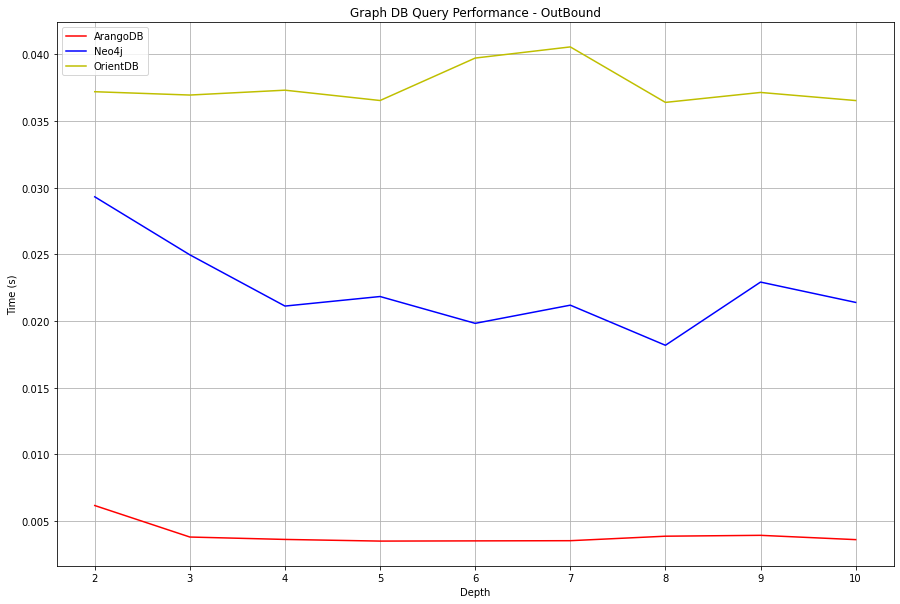

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - OutBound")
depth = [2,3,4,5,6,7,8,9,10]
plt.plot(depth, arango, 'r',label='ArangoDB')
plt.plot(depth, neo, 'b',label='Neo4j')
plt.plot(depth, orient, 'y',label='OrientDB')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

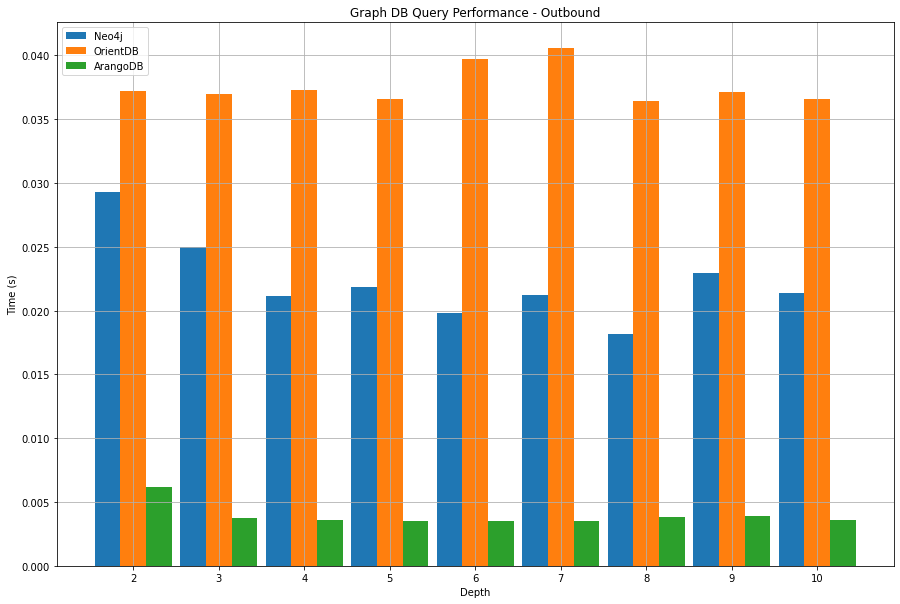

In [15]:
plt.figure(figsize=(15, 10))
w=0.3
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Outbound")
depth = [2,3,4,5,6,7,8,9,10]

bar = np.arange(len(depth))
bar1= [i+w for i in bar]
bar2= [i-w for i in bar]
plt.bar(bar2, neo, w,label='Neo4j')
plt.bar(bar, orient, w,label='OrientDB')
plt.bar(bar1, arango, w,label='ArangoDB')
plt.xticks(bar,depth)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()